In [1]:
import numpy as np
from numpy import linalg as LA
from random import randrange as rg
from setuptools.namespaces import flatten
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\setuptools\distutils_patch.py:25: UserWarning: Distutils was imported before Setuptools. This usage is discouraged and may exhibit undesirable behaviors or errors. Please use Setuptools' objects directly or at least import Setuptools first.
  warnings.warn(


In [20]:
def matrix_create (N, data_type = "float"):
    data = np.random.randint(1, 110, size = (N, N))       
    
    matrix = data[:, :N]
    Y = data[:,-1].reshape(N, 1)
    return data, Y, matrix

try:
    matrix_Y, Y, matrix = matrix_create(int(input("Введите размерность матрицы: ")))
except ValueError:
    print("Ошибка ввода.")
except KeyboardInterrupt:
    print("Прервано пользователем.")

print("\nМатрица потребителей: \n", matrix)
print("\nМатрица конечного потребления: \n", Y)

Введите размерность матрицы: 6

Матрица потребителей: 
 [[ 82  89 109 109  89  16]
 [ 33  25  39  16  29  22]
 [104  77  67 103  63 104]
 [ 92  15  71  63  75 105]
 [ 21  24  48  73  74   1]
 [ 32  60  67 108  95  97]]

Матрица конечного потребления: 
 [[ 16]
 [ 22]
 [104]
 [105]
 [  1]
 [ 97]]


In [23]:
def matrix_consumption(Y, grow, K): 
    grow = list(set(grow))
    
    for i in range(len(grow)):
        if grow[i] >= len(Y):
            print("Неправильные входные данные")
            return
        
    value_grow = np.copy(Y) 
    
    for i in range(len(grow)):
        value_grow[grow[i]] = value_grow[grow[i]] * K #parametr показывает изменение - во сколько раз изменилась цена у отраслей
    return value_grow

try:
    K = float(input("Введите коэффициент для увеличения конечного потребления: ")) #в задаче в 2 раза
    grow = input("Введите номера выбранных отраслей по порядку и через запятую: ")
    grow = list(map(int, grow.split(",")))
    Y2 = matrix_consumption(Y, grow, K)
    print("\n Матрица после увелечения конечного потребления: \n", Y2)
    
except ValueError:
    print("Ошибка ввода.")
except KeyboardInterrupt:
    print("Прервано пользователем.")

Введите коэффициент для увеличения конечного потребления: 2
Введите номера выбранных отраслей по порядку и через запятую: 1

 Матрица после увелечения конечного потребления: 
 [[ 16]
 [ 44]
 [104]
 [105]
 [  1]
 [ 97]]


In [24]:
def create_X(matrix):
    X = np.array([0] * len(matrix)).reshape(len(matrix), 1)
    
    for i in range(len(matrix)):
        X[i] = sum(matrix[i])
    return X

X = create_X(matrix_Y)
print("Матрица значений валового продукта: \n", X)

Матрица значений валового продукта: 
 [[494]
 [164]
 [518]
 [421]
 [241]
 [459]]


In [25]:
def create_A(matrix, X):
    
    A = np.array([[0.] * len(matrix)] * len(matrix))
    
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            A[j][i] = matrix[j][i] / X[i]
    return A

A = create_A(matrix, X)
print ("Матрица прямых затрат: \n", A)

Матрица прямых затрат: 
 [[0.1659919  0.54268293 0.21042471 0.25890736 0.36929461 0.03485839]
 [0.06680162 0.15243902 0.07528958 0.03800475 0.12033195 0.04793028]
 [0.21052632 0.4695122  0.12934363 0.24465558 0.26141079 0.22657952]
 [0.18623482 0.09146341 0.13706564 0.14964371 0.31120332 0.22875817]
 [0.04251012 0.14634146 0.09266409 0.17339667 0.30705394 0.00217865]
 [0.06477733 0.36585366 0.12934363 0.25653207 0.39419087 0.21132898]]


In [30]:
def create_H(A):
    
    E = np.eye(len(A)) 
    
    EA = E + A 
    H = LA.inv(EA)
    return H


H = create_H(A)

print ("Матрица полных затрат: \n", H)

Матрица полных затрат: 
 None


In [27]:
w, v = (np.linalg.eig(A))
F = max(w, key=abs)
print("Число Фробениуса = ",F)
print("\n 1 - Если Н<0, то матрица А не продуктивна.\n 2 - Если F<1, то матрица A не продуктивна. \n 3 - Если F>1 и H>0, то матрица A продуктивна. \n")
for i in flatten(H):
    if i < 0:
        print("Матрица A не продуктивна - см. пункт 1.")
        break
    if i > 0 and F>1:
        print("Матрица A  продуктивна - см. пункт 3.")
        break
    if F<1:
        print("Матрица A не продуктивна - см. пункт 2.")
        break

Число Фробениуса =  (1.0000000000000018+0j)

 1 - Если Н<0, то матрица А не продуктивна.
 2 - Если F<1, то матрица A не продуктивна. 
 3 - Если F>1 и H>0, то матрица A продуктивна. 

Матрица A  продуктивна - см. пункт 3.


In [28]:
def create_X2(H, Y2):
    X2 = H.dot(Y2)
    return X2

X2 = create_X2(H, Y2)
print ("Матрица валового выпуска после увеличения конечного потребления: \n", X2)

Матрица валового выпуска после увеличения конечного потребления: 
 [[-26.15475278]
 [ 32.7240882 ]
 [ 59.18420574]
 [ 79.76683457]
 [-16.91590473]
 [ 53.8848267 ]]


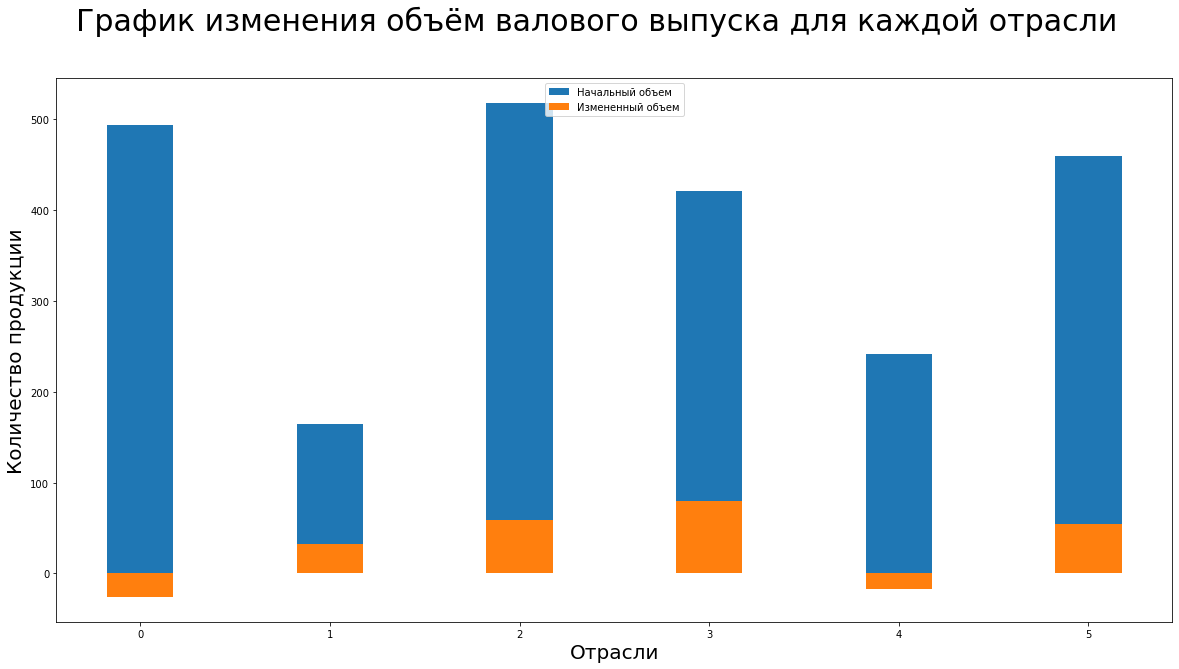

In [29]:
labels = [*range(len(matrix))]
width = 0.35      
fig, ax = plt.subplots(figsize=(20,10))

GR_X = X.reshape(1, len(X))[0]
GR_X2 = X2.reshape(1, len(X2))[0]
ax.bar(labels, GR_X, width, label='Начальный объем')
ax.bar(labels, GR_X2, width, label='Измененный объем')

ax.set_ylabel("Количество продукции", fontsize=20)
ax.set_xticks(labels)
ax.set_xlabel("Отрасли", fontsize=20)

fig.suptitle("График изменения объём валового выпуска для каждой отрасли", fontsize=30)

ax.legend(bbox_to_anchor=(0.5, 1),loc='upper center')

plt.show()